In [51]:
import os
from pathlib import Path

import pandas as pd
from rdkit import Chem

cwd = os.getcwd()
if cwd.endswith('notebook/PG'):
    os.chdir('../..')
    cwd = os.getcwd()

from src.pg_modelling.ligand_utils import sanitize_ligand_name

In [52]:
data_folder = Path(os.path.expanduser('~')) / 'Documents' / 'PG_modelling' / 'ZoocinA_O54308'
assert data_folder.is_dir()

In [53]:
pg_s_zooepidemicus = pd.concat(
    [
        pd.read_excel(
            data_folder / 'S_zooepidemicus_cell_wall_library.xlsx',
            sheet_name=0,
        ),
        pd.read_excel(
            data_folder / 'S_zooepidemicus_cell_wall_library.xlsx',
            sheet_name=1,
        )
    ],
    ignore_index=True,
)
pg_s_zooepidemicus['ligand_id'] = pg_s_zooepidemicus['Name'].apply(sanitize_ligand_name)
pg_s_zooepidemicus = pg_s_zooepidemicus.set_index('ligand_id')
print(f'N = {len(pg_s_zooepidemicus):,}')
pg_s_zooepidemicus.head()

N = 483


,Name,Synonym,Formula,Monoisotopic Mass,Modifications,Degree Amidation,Degree Acetylation,Ontology,PGN Units,Glycan Units,...,Peptide,SMILES,INCHIKEY,clogP,RT,[M+H]+,[M+Na]+,[M+K]+,[M+2H]2+,[M+3H]3+
ligand_id,,,,,,,,,,,,,,,,,,,,,
K-3-NH2-AAA,None-K[3-NH2-AAA],None--Lys[3--NH2--Ala.Ala.Ala],C15H29N5O5,359.21687,EPase P2,0,0,P3--S3,1,0,...,K[3-NH2-AAA],CC(N)C(=O)NC(C)C(=O)NC(C)C(=O)NCCCCC(N)C(=O)O,CDJMGOXZPXJIPZ-UHFFFAOYSA-N,-1.9586,0,360.22415,382.20609,398.18003,180.61572,120.74624
qK-3-NH2-AAA,None-qK[3-NH2-AAA],None--γ-isoGln.Lys[3--NH2--Ala.Ala.Ala],C20H37N7O7,487.27545,EPase P1,1,0,P3--S3,1,0,...,qK[3-NH2-AAA],CC(N)C(=O)NC(C)C(=O)NC(C)C(=O)NCCCCC(NC(=O)CCC...,KAHXFTOPUVCJRZ-UHFFFAOYSA-N,-3.2083,0,488.28273,510.26467,526.23861,244.64501,163.43243
AqK-3-NH2-AAA,None-AqK[3-NH2-AAA],None--Ala.γ-isoGln.Lys[3--NH2--Ala.Ala.Ala],C23H42N8O8,558.31256,Amidase,1,0,P3--S3,1,0,...,AqK[3-NH2-AAA],CC(N)C(=O)NC(C)C(=O)NC(C)C(=O)NCCCCC(NC(=O)CCC...,IANYAHOLBSYEDC-UHFFFAOYSA-N,-3.7036,0,559.31984,581.30178,597.27572,280.16356,187.11147
K-3-NH2-AA,None-K[3-NH2-AA],None--Lys[3--NH2--Ala.Ala],C12H24N4O4,288.17976,EPase P2,0,0,P3--S2,1,0,...,K[3-NH2-AA],CC(N)C(=O)NC(C)C(=O)NCCCCC(N)C(=O)O,JWCZPEHTCFTHJE-UHFFFAOYSA-N,-1.4633,0,289.18704,311.16898,327.14292,145.09716,97.06720
qK-3-NH2-AA,None-qK[3-NH2-AA],None--γ-isoGln.Lys[3--NH2--Ala.Ala],C17H32N6O6,416.23833,EPase P1,1,0,P3--S2,1,0,...,qK[3-NH2-AA],CC(N)C(=O)NC(C)C(=O)NCCCCC(NC(=O)CCC(N)C(N)=O)...,LSONAEWDWVGBIY-UHFFFAOYSA-N,-2.7130,0,417.24561,439.22755,455.20149,209.12645,139.75339


In [54]:
subset_ids = [
    'AqKAA',
    'NAG-NAM',
    'NAG-NAM-AqKAA',
    'NAG-NAM-AqKAA-3-NH2-AA',
    'NAG-NAM-AqKAA-3-NH2-AAA',
    'KA-3-NH2-AA-3br-4-AqKA',
    'KA-3-NH2-AAA-3br-4-AqKA',
]
pg_subset = pg_s_zooepidemicus.loc[subset_ids].rename(columns={
    'SMILES': 'smiles' 
})[['smiles']]
pg_subset
pg_subset.to_csv(data_folder / 'ligands.csv')
print(f'N = {len(pg_subset):,}')
pg_subset

N = 7


,smiles
ligand_id,
AqKAA,CC(N)C(=O)NC(CCC(=O)NC(CCCCN)C(=O)NC(C)C(=O)NC...
NAG-NAM,CC(=O)NC1C(OC2C(CO)OC(O)C(NC(C)=O)C2OC(C)C(=O)...
NAG-NAM-AqKAA,CC(=O)NC1C(OC2C(CO)OC(O)C(NC(C)=O)C2OC(C)C(=O)...
NAG-NAM-AqKAA-3-NH2-AA,CC(=O)NC1C(OC2C(CO)OC(O)C(NC(C)=O)C2OC(C)C(=O)...
NAG-NAM-AqKAA-3-NH2-AAA,CC(=O)NC1C(OC2C(CO)OC(O)C(NC(C)=O)C2OC(C)C(=O)...
KA-3-NH2-AA-3br-4-AqKA,CC(N)C(=O)NC(CCC(=O)NC(CCCCN)C(=O)NC(C)C(=O)NC...
KA-3-NH2-AAA-3br-4-AqKA,CC(N)C(=O)NC(CCC(=O)NC(CCCCN)C(=O)NC(C)C(=O)NC...


## Render ligands

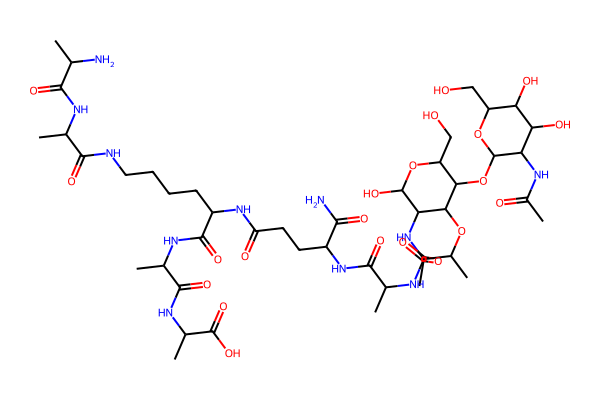

In [55]:
mol = Chem.MolFromSmiles(pg_subset.loc['NAG-NAM-AqKAA-3-NH2-AA', 'smiles'])
img = Chem.Draw.MolToImage(mol, size=(600, 400), dpi=300)
display(img)

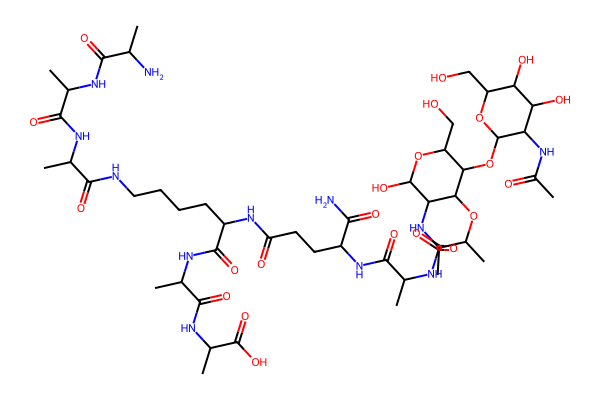

In [56]:
mol = Chem.MolFromSmiles(pg_subset.loc['NAG-NAM-AqKAA-3-NH2-AAA', 'smiles'])
img = Chem.Draw.MolToImage(mol, size=(600, 400), dpi=300)
display(img)

## Results

### AF3

In [59]:
af3_results = pd.read_csv(data_folder / 'modelling' / 'af3' / 'scores.csv')
af3_results = af3_results.sort_values(
    [
        'protein_name', 'ligand_name', 'posebusters_score', 'aev_plig_pK', 'confidence',
    ],
    ascending=False,
).drop_duplicates(['protein_name', 'ligand_name']).sort_values(
    [
        'posebusters_score', 'confidence', 'aev_plig_pK',
    ],
    ascending=False
).set_index('ligand_name')
af3_results

,protein_name,seed,sample,structure_file,ptm,iptm,confidence,posebusters_score,energy_ratio,posebusters_errors,aev_plig_pK
ligand_name,,,,,,,,,,,
NAG-NAM-AqKAA-3-NH2-AA,ZoocinA_O54308_TRD_179_283,664,3,/home/rs1521/PG/ZoocinA_O54308/modelling/af3/r...,0.86,0.81,0.820,20,3.2,NaN,5.70
NAG-NAM,ZoocinA_O54308_TRD_179_283,364,3,/home/rs1521/PG/ZoocinA_O54308/modelling/af3/r...,0.87,0.78,0.798,20,2.4,NaN,5.08
AqKAA,ZoocinA_O54308_TRD_179_283,270,1,/home/rs1521/PG/ZoocinA_O54308/modelling/af3/r...,0.88,0.76,0.784,20,2.9,NaN,5.37
NAG-NAM-AqKAA,ZoocinA_O54308_TRD_179_283,451,2,/home/rs1521/PG/ZoocinA_O54308/modelling/af3/r...,0.80,0.64,0.672,20,2.1,NaN,5.61
NAG-NAM-AqKAA-3-NH2-AAA,ZoocinA_O54308_TRD_179_283,231,2,/home/rs1521/PG/ZoocinA_O54308/modelling/af3/r...,0.76,0.55,0.592,20,2.3,NaN,5.74
KA-3-NH2-AA-3br-4-AqKA,ZoocinA_O54308_TRD_179_283,99,0,/home/rs1521/PG/ZoocinA_O54308/modelling/af3/r...,0.79,0.54,0.590,20,3.4,NaN,5.49
KA-3-NH2-AAA-3br-4-AqKA,ZoocinA_O54308_TRD_179_283,124,4,/home/rs1521/PG/ZoocinA_O54308/modelling/af3/r...,0.75,0.48,0.534,20,4.5,NaN,5.31


### Boltz

In [28]:
boltz_results = pd.read_csv(data_folder / 'modelling' / 'boltz' / 'scores.csv')
boltz_results = boltz_results.drop_duplicates(['protein_name', 'ligand_name']).set_index('ligand_name')
boltz_results

,protein_name,seed,sample,structure_file,ptm,iptm,confidence,posebusters_score,energy_ratio,posebusters_errors
ligand_name,,,,,,,,,,
AqKAA,ZoocinA_O54308_TRD_179_283,832,0,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.797528,0.305290,0.404,20,7.5,NaN
NAG-NAM-AqKAA,ZoocinA_O54308_TRD_179_283,721,1,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.711614,0.324709,0.402,20,5.4,NaN
NAG-NAM,ZoocinA_O54308_TRD_179_283,31,0,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.795621,0.299257,0.399,20,3.2,NaN
KA-3-NH2-AA-3br-4-AqKA,ZoocinA_O54308_TRD_179_283,31,1,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.716502,0.229483,0.327,20,5.9,NaN
KA-3-NH2-AAA-3br-4-AqKA,ZoocinA_O54308_TRD_179_283,31,0,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.699655,0.229929,0.324,20,10.1,NaN
NAG-NAM-AqKAA-3-NH2-AA,ZoocinA_O54308_TRD_179_283,31,3,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.646219,0.211506,0.298,20,3.5,NaN
NAG-NAM-AqKAA-3-NH2-AAA,ZoocinA_O54308_TRD_179_283,832,1,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.630536,0.197007,0.284,20,5.6,NaN


### Chai

In [29]:
chai_results = pd.read_csv(data_folder / 'modelling' / 'chai' / 'scores.csv')
chai_results = chai_results.drop_duplicates(['protein_name', 'ligand_name']).set_index(['ligand_name'])
chai_results

,protein_name,seed,sample,structure_file,ptm,iptm,confidence,posebusters_score,energy_ratio,posebusters_errors
ligand_name,,,,,,,,,,
KA-3-NH2-AA-3br-4-AqKA,ZoocinA_O54308_TRD_179_283,802,1,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.914452,0.684286,0.730,20,3.7,NaN
NAG-NAM-AqKAA-3-NH2-AAA,ZoocinA_O54308_TRD_179_283,250,4,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.827890,0.561590,0.615,20,2.9,NaN
NAG-NAM-AqKAA,ZoocinA_O54308_TRD_179_283,250,4,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.852985,0.541989,0.604,20,2.6,NaN
AqKAA,ZoocinA_O54308_TRD_179_283,802,1,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.901586,0.500564,0.581,20,3.4,NaN
NAG-NAM,ZoocinA_O54308_TRD_179_283,250,2,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.889970,0.401665,0.499,20,2.2,NaN
NAG-NAM-AqKAA-3-NH2-AA,ZoocinA_O54308_TRD_179_283,802,0,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.750999,0.358523,0.437,20,5.5,NaN
KA-3-NH2-AAA-3br-4-AqKA,ZoocinA_O54308_TRD_179_283,802,2,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.746062,0.235026,0.337,20,3.6,NaN


In [44]:
chai_results.loc['KA-3-NH2-AA-3br-4-AqKA', 'structure_file']

'/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/chai/results/ZoocinA_O54308_TRD_179_283__KA-3-NH2-AA-3br-4-AqKA/seed_802/pred.model_idx_1.cif'

In [45]:
chai_results.loc['KA-3-NH2-AAA-3br-4-AqKA', 'structure_file']

'/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/chai/results/ZoocinA_O54308_TRD_179_283__KA-3-NH2-AAA-3br-4-AqKA/seed_802/pred.model_idx_2.cif'

In [50]:
pd.read_csv(data_folder / 'modelling' / 'chai' / 'scores.csv', index_col='ligand_name').loc['KA-3-NH2-AA-3br-4-AqKA']

,protein_name,seed,sample,structure_file,ptm,iptm,confidence,posebusters_score,energy_ratio,posebusters_errors
ligand_name,,,,,,,,,,
KA-3-NH2-AA-3br-4-AqKA,ZoocinA_O54308_TRD_179_283,802,1,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.914452,0.684286,0.730,20,3.7,NaN
KA-3-NH2-AA-3br-4-AqKA,ZoocinA_O54308_TRD_179_283,250,0,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.913397,0.684674,0.730,20,4.0,NaN
KA-3-NH2-AA-3br-4-AqKA,ZoocinA_O54308_TRD_179_283,250,4,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.913402,0.683017,0.729,20,3.1,NaN
KA-3-NH2-AA-3br-4-AqKA,ZoocinA_O54308_TRD_179_283,250,3,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.913172,0.682967,0.729,20,3.3,NaN
KA-3-NH2-AA-3br-4-AqKA,ZoocinA_O54308_TRD_179_283,802,3,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.912955,0.681266,0.728,20,5.5,NaN
KA-3-NH2-AA-3br-4-AqKA,ZoocinA_O54308_TRD_179_283,250,2,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.912340,0.680435,0.727,20,4.0,NaN
KA-3-NH2-AA-3br-4-AqKA,ZoocinA_O54308_TRD_179_283,802,0,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.908134,0.681981,0.727,20,4.3,NaN
KA-3-NH2-AA-3br-4-AqKA,ZoocinA_O54308_TRD_179_283,802,4,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.905767,0.676170,0.722,20,3.3,NaN
KA-3-NH2-AA-3br-4-AqKA,ZoocinA_O54308_TRD_179_283,964,2,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.908423,0.663767,0.713,20,3.6,NaN


### Protenix

In [30]:
protenix_results = pd.read_csv(data_folder / 'modelling' / 'protenix' / 'scores.csv')
protenix_results = protenix_results.drop_duplicates(['protein_name', 'ligand_name']).set_index(['ligand_name'])
protenix_results

,protein_name,seed,sample,structure_file,ptm,iptm,confidence,posebusters_score,energy_ratio,posebusters_errors
ligand_name,,,,,,,,,,
NAG-NAM,ZoocinA_O54308_TRD_179_283,669,0,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.977470,0.972698,0.974,20,2.7,NaN
AqKAA,ZoocinA_O54308_TRD_179_283,669,0,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.976417,0.959108,0.963,20,4.5,NaN
NAG-NAM-AqKAA-3-NH2-AA,ZoocinA_O54308_TRD_179_283,669,1,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.965670,0.939814,0.945,20,4.1,NaN
KA-3-NH2-AA-3br-4-AqKA,ZoocinA_O54308_TRD_179_283,210,0,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.966092,0.929343,0.937,20,3.4,NaN
KA-3-NH2-AAA-3br-4-AqKA,ZoocinA_O54308_TRD_179_283,83,0,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.963945,0.924820,0.933,20,4.6,NaN
NAG-NAM-AqKAA-3-NH2-AAA,ZoocinA_O54308_TRD_179_283,669,1,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.954948,0.915240,0.923,20,4.1,NaN
NAG-NAM-AqKAA,ZoocinA_O54308_TRD_179_283,669,0,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.956019,0.911162,0.920,20,9.3,NaN
